This notebook was created by Aryan Sharma, a B.Tech student at VIT.

I'm passionate about exploring Deep Learning and this notebook showcases my implementation of a Neural Network model for the classic MNIST handwritten digit classification task.


Here's a quick overview of the code in the notebook:

Step 1: We'll begin by loading the MNIST dataset, containing thousands of labelled images of handwritten digits.<br>
Step 2: To prepare the data for our model, we'll reshape and normalize the pixel values.<br>
Step 3: Define and construct a Neural Network architecture suitable for image classification.<br>
Step 4: We'll train the model on the MNIST training data, adjusting it's parameters to improve its ability to recognize digits.<br>
Step 5: After training we assess its performance on the MNIST test set and analyze its strengths and weaknesses.<br>
Step 6: We'll potentially modify the model architecture to squeeze out even better performance.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load Dataset
# Step 2: Pre-process Data => reshape, normalize
# Step 3: Create Model
# Step 4: Train Model
# Step 5: Test Model
# Step 6: Tune hyperparameters and modify model

In [3]:
# We load the dataset from tensorflow keras library

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# Checking the size of input and output in order to reshape it into a 1D array

print("Shape of training data for input(X): ", X_train.shape)
print("Shape of training data for output(Y): ",Y_train.shape)
print("Shape of test data for input(X): ", X_test.shape)
print("Shape of test data for output(Y): ",Y_test.shape)

Shape of training data for input(X):  (60000, 28, 28)
Shape of training data for output(Y):  (60000,)
Shape of test data for input(X):  (10000, 28, 28)
Shape of test data for output(Y):  (10000,)


In [5]:
# The training data has 60,000 samples and the test data has 10,000 samples.
# The data is currently in a 3D array, in order to represent the sample number and the X,Y position of a pixel [i][x][y]
# Since the data is a grey scale image the value of a pixel will only be 0 or 1, We will reshape this data into a 1D array for ease of data processing
# For the output we will convert it into categorical

X_train = X_train.reshape((60000, 28*28*1))
Y_train = to_categorical(Y_train)
X_test = X_test.reshape((10000, 28*28*1))
Y_test = to_categorical(Y_test)

In [6]:
# We will now normalize the data by dividing it by 255 since that is the maximum value a pixel can have
# In this case a white pixel will have the value 0/255 = 0 and a black pixel will have the value 255/255 = 1 after normalization

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [7]:
# Now that the data pre-processing process has been completed, we will define the function to build the model

def build_nn():
  model = Sequential()
  model.add(Dense(300, input_shape=(28*28,), activation="relu"))
  model.add(Dense(150, activation="relu"))
  model.add(Dense(75, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [8]:
# Now we wiill build and compile the model

model = build_nn()
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 12s 25ms/step - loss: 0.3613 - accuracy: 0.8911 - val_loss: 0.1659 - val_accuracy: 0.9515
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1194 - accuracy: 0.9650 - val_loss: 0.1055 - val_accuracy: 0.9690
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0747 - accuracy: 0.9774 - val_loss: 0.1107 - val_accuracy: 0.9663
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0556 - accuracy: 0.9832 - val_loss: 0.0915 - val_accuracy: 0.9725
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0950 - val_accuracy: 0.9718
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0906 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.1130 - val_accuracy: 0.972

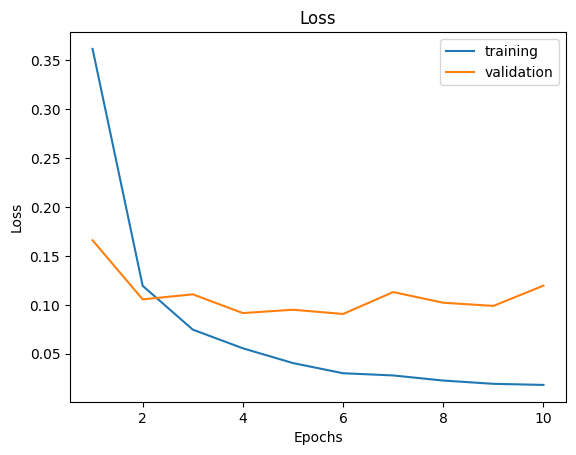

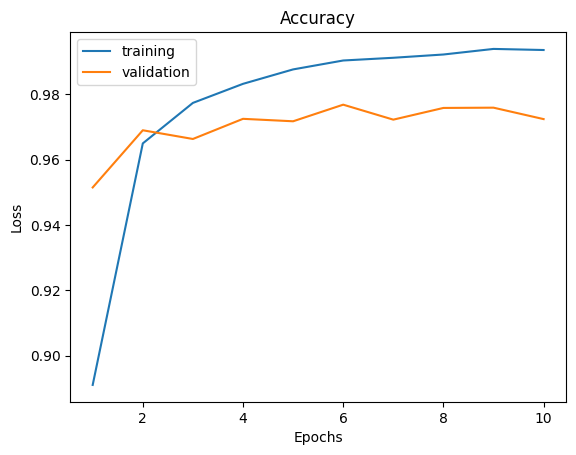

In [9]:
# Now that compilation is done and the model has been trained, we can see its performance using the accuracy and loss metrics for test and validation data sets

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epoch = range(1, len(accuracy) + 1)

plt.plot(epoch, loss, label = "training")
plt.plot(epoch, val_loss, label = "validation")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


plt.plot(epoch, accuracy, label = "training")
plt.plot(epoch, val_accuracy, label = "validation")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Set Loss: {loss*100:.2f}%")
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9745
Test Set Loss: 11.00%
Test Accuracy: 97.45%


In [11]:
# From the graphs we can infer that the model is working great for training set but it's performance is a little less for the validation set
# In order to deal with this I will introduce dropout in the model in order to reduce the model overfitting to the training data, we will also see wether this improves the models performance for test set.

In [12]:
def build_nn():
  model = Sequential()
  model.add(Dense(300, input_shape=(28*28,), activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(150, activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(75, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [13]:
model = build_nn()
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 14ms/step - loss: 0.5122 - accuracy: 0.8404 - val_loss: 0.1536 - val_accuracy: 0.9555
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1822 - accuracy: 0.9480 - val_loss: 0.1167 - val_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1288 - accuracy: 0.9623 - val_loss: 0.1072 - val_accuracy: 0.9688
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1049 - accuracy: 0.9694 - val_loss: 0.0981 - val_accuracy: 0.9725
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0862 - accuracy: 0.9753 - val_loss: 0.0916 - val_accuracy: 0.9748
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.0873 - val_accuracy: 0.9754
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0683 - accuracy: 0.9804 - val_loss: 0.0906 - val_accuracy: 0.9753

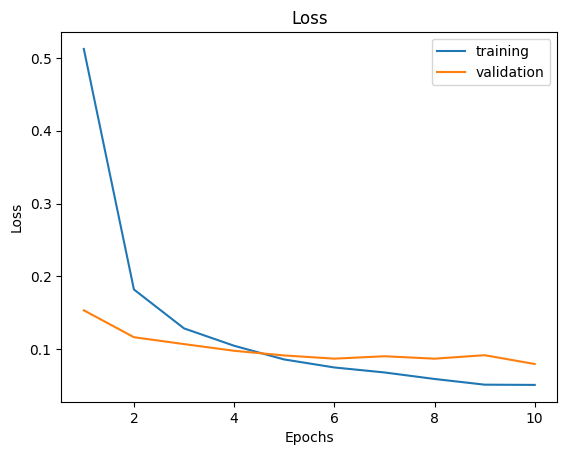

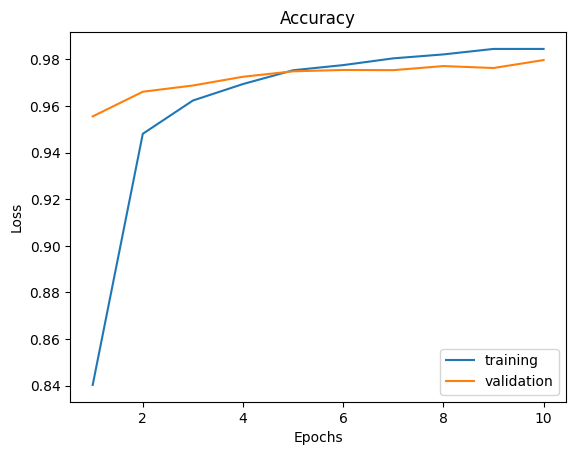

In [15]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epoch = range(1, len(accuracy) + 1)

plt.plot(epoch, loss, label = "training")
plt.plot(epoch, val_loss, label = "validation")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


plt.plot(epoch, accuracy, label = "training")
plt.plot(epoch, val_accuracy, label = "validation")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Set Loss: {loss*100:.2f}%")
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.0797 - accuracy: 0.9797
Test Set Loss: 7.97%
Test Accuracy: 97.97%


In [17]:
# As we can see from the above graphs and test results, adding dropout did reduce the performance of the model on the training data set by a small degree but it improved its performance for the validation and testing data set
# Therefore we have successfully trained a deep nueral network to classify images from the MNIST dataset.